j =  0
j =  200
j =  400


(array([ 2.,  0.,  2.,  6., 17., 26., 42., 52., 59., 75., 54., 55., 32.,
        42., 16.,  5.,  6.,  5.,  2.,  2.]),
 array([-0.2814231 , -0.27915509, -0.27688707, -0.27461906, -0.27235105,
        -0.27008304, -0.26781503, -0.26554702, -0.263279  , -0.26101099,
        -0.25874298, -0.25647497, -0.25420696, -0.25193894, -0.24967093,
        -0.24740292, -0.24513491, -0.2428669 , -0.24059889, -0.23833087,
        -0.23606286]),
 <a list of 20 Patch objects>)

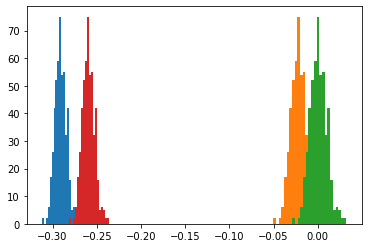

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

g = 9.81 #m/s
n = 5000

sd = []
Q = []
E = []
Z = []
EB = []

sQ = []
sE = []
sZ = []
sEB = []


b0 = []
c0 = []
db = []
dc = []

for j in range(500):
    if (j%200==0):
        print ("j = ",j)
    #b0.append(np.random.random()*10.)
    b0.append(-20)
    #db.append(np.random.random()*b0[j]*0.1)
    #db.append(np.random.random()*b0[j]*0.05)
    db.append(1)
    #c0.append(-np.random.random()*10.)
    c0.append(-20)
    #dc.append(-np.random.random()*c0[j]*0.1)
    #dc.append(-np.random.random()*c0[j]*0.05)
    dc.append(1)
    
    D0 = b0[j]**2-4*c0[j]

    # b0 is a negative number ( = 2v_0y/(-g) )
    # c0 is a negative number ( = 2(-Dy)/(-g) and Dy is negative)
    x0 = 0.5*(-b0[j]+D0**(0.5))
    vy = -g*b0[j]/2,
    
    #db = 1. ; dc = 1.
    #print('For this run,               v_y was {:.3f} m/s'.format(g*b0/2))
    #print('                            Dy  was {:.3f} m'.format(-g*c0/2))
    #print('And the computed time of flight was {:.3f} s'.format(x0))
    #print('================================================')
    #print('Uncertainty in b: {:.3f}'.format(db))
    #print('Uncertainty in c: {:.3f}'.format(dc))
    
    #Q is the "naiive sophisticated method (eqn 14)
    Q.append(((2*(b0[j]**2)-4*c0[j])*(db[j])**2+4*(dc[j])**2)/(4*D0))
    
    #E is an empirical attempt to get better results (eqn 19)
    E.append(((4*(b0[j]**2)-4*c0[j])*(db[j])**2+4*(dc[j])**2)/(4*D0))
    
    #Z is the calculus-based result (eqn 18)
    Z.append(((2*(b0[j]**2)-4*c0[j]-2*b0[j]*D0**0.5)*(db[j])**2+4*(dc[j])**2)/(4*D0))
    
    #EB is the calculation of Brash
    EB.append(((2*(b0[j]**2)-4*c0[j])*(db[j])**2+4*(dc[j])**2-4*b0[j]*db[j]*dc[j])/(4*D0))
    
    x = []
    for i in range(n):
      b = np.random.normal(loc=b0[j],scale=db[j])
      c = np.random.normal(loc=c0[j],scale=dc[j])
      D = b**2-4*c
      x.append(0.5*(-b+D**0.5))
    
    x = np.array(x)
    #plt.hist(x,bins=20)
    sd.append(np.std(x,ddof=1))
    
    sZ.append((Z[j]**0.5-sd[j])/sd[j])
    sE.append((E[j]**0.5-sd[j])/sd[j])
    sQ.append((Q[j]**0.5-sd[j])/sd[j])
    sEB.append((EB[j]**0.5-sd[j])/sd[j])
    
    #print('Computation of dt based varying b and c was {:.3f}'.format(sd))
    #print('Z Calculation of uncertainty in t was       {:.3f} with error {:.3f}'
    #     .format(Z**0.5,(Z**0.5-sd)/sd))
    #print('E Calculation of uncertainty in t was       {:.3f} with error {:.3f}'
    #     .format(E**0.5,(E**0.5-sd)/sd))
    #print('Q Calculation of uncertainty in t was       {:.3f} with error {:.3f}'
    #     .format(Q**0.5,(Q**0.5-sd)/sd))

###TO DO:  Run each model many times and find the average (absolute) error
###        and standard deviation to verify my gut feeling of 25% for Q
###        and 5% for both E and Z.

plt.hist(sQ,bins=20)
plt.hist(sE,bins=20)
plt.hist(sZ,bins=20)
plt.hist(sEB,bins=20)

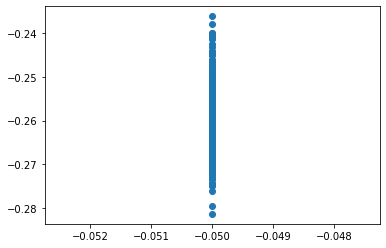

In [56]:
percentb = np.array(db)/np.array(b0)
plt.scatter(percentb,sEB)

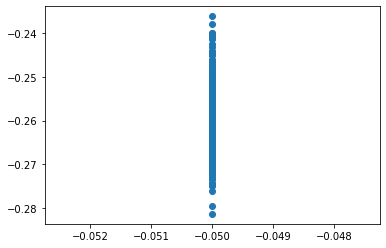

In [57]:
percentc = np.array(dc)/np.array(c0)
plt.scatter(percentc,sEB)

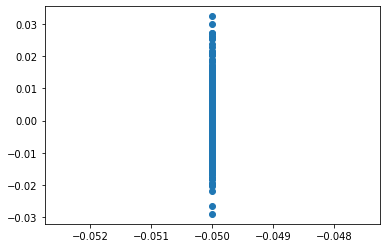

In [58]:
plt.scatter(percentb,sZ)

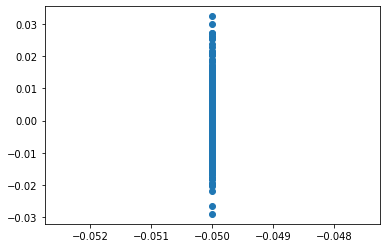

In [59]:
plt.scatter(percentc,sZ)

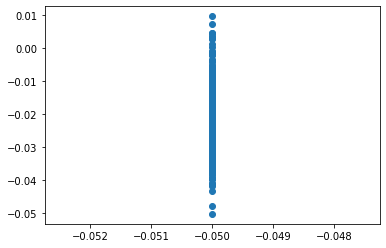

In [60]:
plt.scatter(percentb,sE)

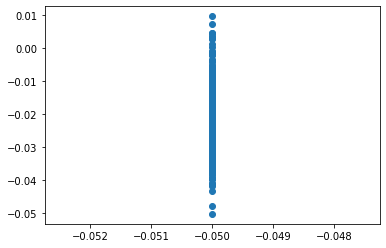

In [61]:
plt.scatter(percentc,sE)

(array([  1.,   0.,   2.,  11.,  37.,  97., 232., 361., 587., 754., 842.,
        732., 583., 386., 211.,  98.,  42.,  12.,   8.,   4.]),
 array([16.84432287, 17.23470387, 17.62508487, 18.01546587, 18.40584687,
        18.79622787, 19.18660887, 19.57698987, 19.96737087, 20.35775187,
        20.74813287, 21.13851388, 21.52889488, 21.91927588, 22.30965688,
        22.70003788, 23.09041888, 23.48079988, 23.87118088, 24.26156188,
        24.65194288]),
 <a list of 20 Patch objects>)

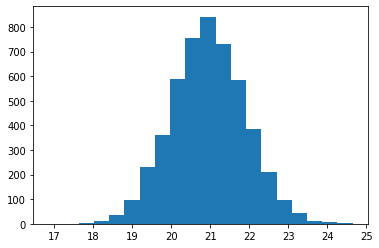

In [62]:
plt.hist(x,bins=20)

(array([ 2.,  4.,  4.,  5., 10., 20., 41., 35., 61., 64., 59., 64., 49.,
        36., 21., 15.,  6.,  2.,  0.,  2.]),
 array([0.92753494, 0.93046248, 0.93339002, 0.93631755, 0.93924509,
        0.94217263, 0.94510016, 0.9480277 , 0.95095524, 0.95388277,
        0.95681031, 0.95973784, 0.96266538, 0.96559292, 0.96852045,
        0.97144799, 0.97437553, 0.97730306, 0.9802306 , 0.98315814,
        0.98608567]),
 <a list of 20 Patch objects>)

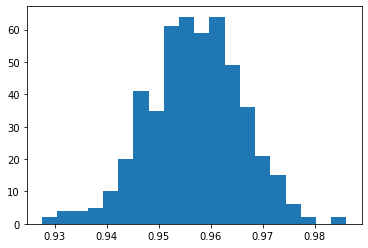

In [63]:
plt.hist(sd,bins=20)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 500.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-0.03958333,  0.01041667,  0.06041667,  0.11041667,  0.16041667,
         0.21041667,  0.26041667,  0.31041667,  0.36041667,  0.41041667,
         0.46041667,  0.51041667,  0.56041667,  0.61041667,  0.66041667,
         0.71041667,  0.76041667,  0.81041667,  0.86041667,  0.91041667,
         0.96041667]),
 <a list of 20 Patch objects>)

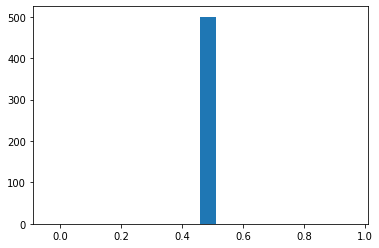

In [64]:
plt.hist(Q,bins=20)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 500.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.37708333, 0.42708333, 0.47708333, 0.52708333, 0.57708333,
        0.62708333, 0.67708333, 0.72708333, 0.77708333, 0.82708333,
        0.87708333, 0.92708333, 0.97708333, 1.02708333, 1.07708333,
        1.12708333, 1.17708333, 1.22708333, 1.27708333, 1.32708333,
        1.37708333]),
 <a list of 20 Patch objects>)

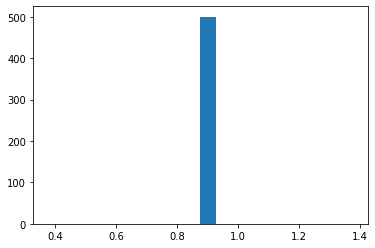

In [65]:
plt.hist(E,bins=20)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 500.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.41685213, 0.46685213, 0.51685213, 0.56685213, 0.61685213,
        0.66685213, 0.71685213, 0.76685213, 0.81685213, 0.86685213,
        0.91685213, 0.96685213, 1.01685213, 1.06685213, 1.11685213,
        1.16685213, 1.21685213, 1.26685213, 1.31685213, 1.36685213,
        1.41685213]),
 <a list of 20 Patch objects>)

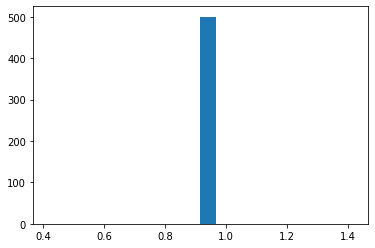

In [66]:
plt.hist(Z,bins=20)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 500.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.00208333, 0.05208333, 0.10208333, 0.15208333, 0.20208333,
        0.25208333, 0.30208333, 0.35208333, 0.40208333, 0.45208333,
        0.50208333, 0.55208333, 0.60208333, 0.65208333, 0.70208333,
        0.75208333, 0.80208333, 0.85208333, 0.90208333, 0.95208333,
        1.00208333]),
 <a list of 20 Patch objects>)

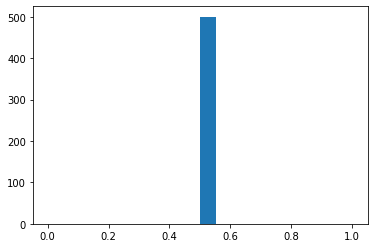

In [67]:
plt.hist(EB,bins=20)